**Data Dictionary**

<font color='blue'><b>- enrolldt : Enrollment Date <br>
<font color='blue'><b>- price: Membership price <br>
<font color='blue'><b>- downpmt: Downpayment <br>
<font color='blue'><b>- monthdue: Months Due <br>
<font color='blue'><b>- pmttype: Payment Type (1: Credit Card, 3: Cash , 4: Check, 5: Debit Card) <br>
<font color='blue'><b>- use: Usage <br>
<font color='blue'><b>- age: Age of customer <br>
<font color='blue'><b>- gender: Gender of customer(1: Male, 2: Female) <br>
<font color='blue'><b>- default: 1: Default, 0 Non-Default <br>

**Importing basic libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read data**

In [2]:
df = pd.read_csv('Verizon.csv')

### 1. Getting familiar with the data

**Peak the data frame**

In [3]:
df.head()

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
0,2020,1,12,2178.85,250.00,6.0,1928.85,321.475000,4,1,0,2,0
1,2020,6,15,1543.65,1543.65,6.0,0.00,0.000000,1,0,0,2,0
2,2020,4,19,1107.67,125.00,5.0,982.67,196.534000,1,0,0,2,0
3,2020,3,17,950.44,237.61,9.0,712.83,79.203333,5,0,0,1,0
4,2020,8,21,1436.00,250.00,9.0,1186.00,131.777778,3,0,0,2,0


**Data frame info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24833 entries, 0 to 24832
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             24833 non-null  int64  
 1   month            24833 non-null  int64  
 2   day              24833 non-null  int64  
 3   price            24833 non-null  float64
 4   downpmt          24833 non-null  float64
 5   monthdue         24833 non-null  float64
 6   payment_left     24833 non-null  float64
 7   monthly_payment  24833 non-null  float64
 8   pmttype          24833 non-null  int64  
 9   credit_score     24833 non-null  int64  
 10  age              24833 non-null  int64  
 11  gender           24833 non-null  int64  
 12  default          24833 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.5 MB


**Basic stats descriptive statistics (mean, median, min, max, standard deviation) for each field**

In [5]:
df.describe()

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
count,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000
mean,2020.601377,6.499013,13.041397,1003.756083,199.799561,8.288312,803.956522,144.342202,3.093223,1.944952,29.199372,1.498087,0.115049
std,0.489625,3.458227,7.169510,439.278060,335.465403,7.109477,472.899790,190.091249,1.559949,2.315778,13.278939,0.500006,0.319087
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2020.000000,3.000000,7.000000,699.000000,49.000000,5.500000,536.820000,61.451579,1.000000,0.000000,22.000000,1.000000,0.000000
50%,2021.000000,6.000000,13.000000,999.000000,100.000000,6.000000,855.000000,116.941176,3.000000,1.000000,28.000000,1.000000,0.000000
75%,2021.000000,10.000000,19.000000,1249.000000,175.000000,9.000000,1116.880000,184.907273,4.000000,3.000000,36.000000,2.000000,0.000000
max,2021.000000,12.000000,25.000000,9371.250000,9371.250000,120.000000,5045.000000,19639.750000,5.000000,8.000000,99.000000,2.000000,1.000000


**Check for missing values**

<Axes: >

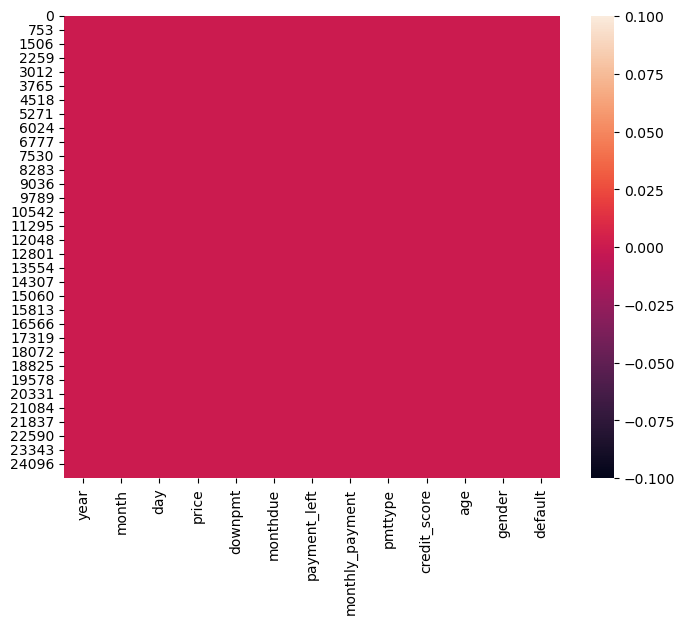

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

<font color='red'><b> What is your initial take on the dataset and it's completeness?

### 2. Exploratory Data Analysis

**Check out how many people defaulted**

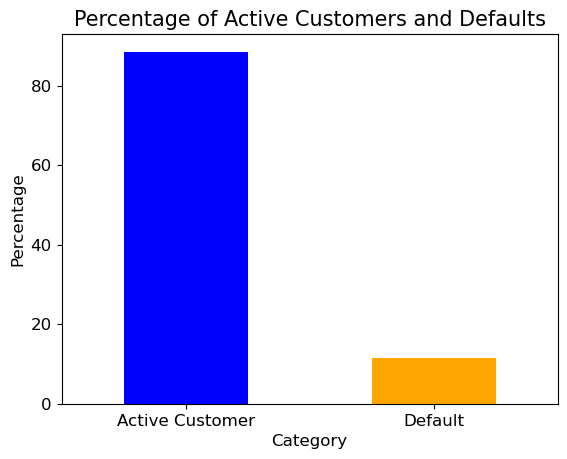

In [15]:
df['default'] = df['default'].replace({0: 'Active Customer', 1: 'Default'})
zeroes_and_ones_percentage = df['default'].value_counts(normalize=True) * 100

# Plot a bar graph
zeroes_and_ones_percentage.plot(kind='bar', rot=0, color=['blue', 'orange'])
plt.title('Percentage of Active Customers and Defaults', fontsize=15)
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

**Default by gender**

In [12]:
sns.__version__

'0.11.1'

Text(0, 0.5, 'Count')

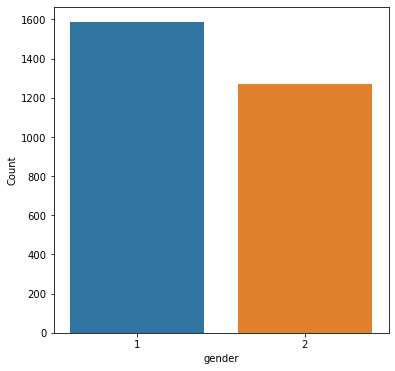

In [8]:
plt.figure(figsize=(6,6))
df_default = df[df['default']==1]
sns.countplot(df_default['gender'])
plt.xlabel('gender')
plt.ylabel('Count')

**Default by payment type**

Text(0, 0.5, 'Count')

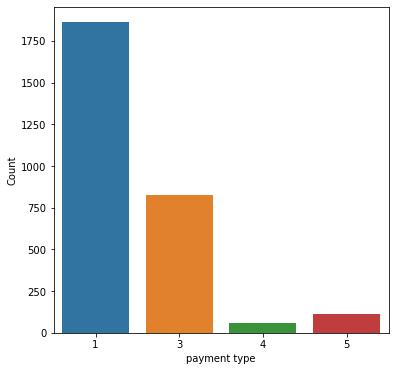

In [16]:
plt.figure(figsize=(6,6))
df_default = df[df['default']==1]
sns.countplot(df_default['pmttype'])
plt.xlabel('payment type')
plt.ylabel('Count')

**Default by age**

Text(0, 0.5, 'Count')

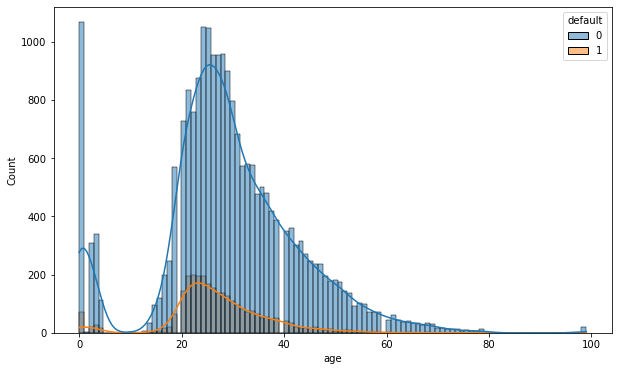

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "age", kde = True, hue = "default")
plt.xlabel('age')
plt.ylabel('Count')

**Default by down payment**

Text(0, 0.5, 'Count')

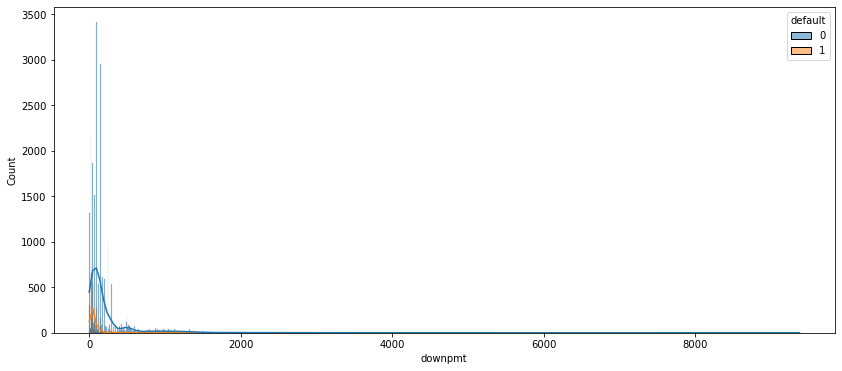

In [18]:
plt.figure(figsize=(14,6))
sns.histplot(data = df, x = "downpmt", kde = True, hue = "default")
plt.xlabel('downpmt')
plt.ylabel('Count')

**Default by credit score**

Text(0, 0.5, 'Count')

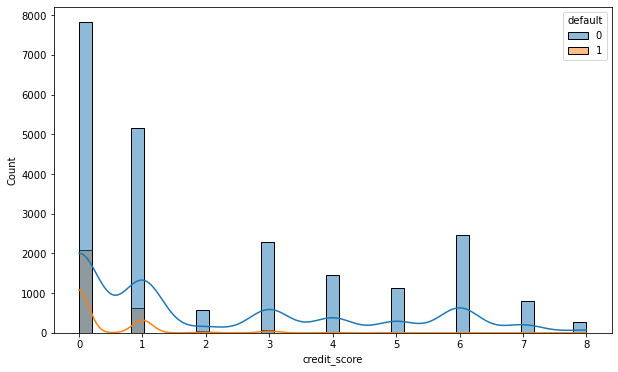

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "credit_score", kde = True, hue = "default")
plt.xlabel('credit_score')
plt.ylabel('Count')

**Default by price**

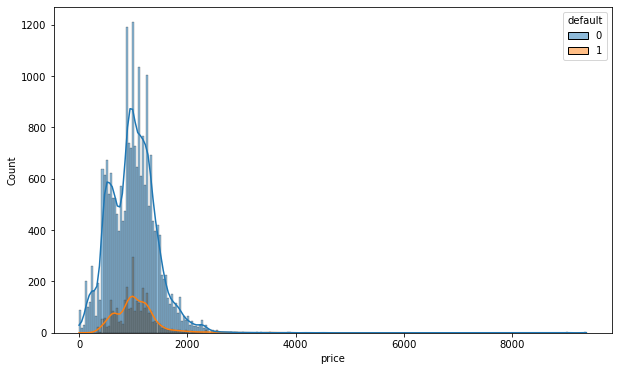

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "price", kde = True, hue = "default")
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

<font color='red'><b>See if any columns have outliers. Try removing them and making EDA plots again

<font color='red'><b>Can you identify certain individuals that tend to default more than others based on the above EDA?

<font color='red'><b>What other EDA's can you think of doing? Try 1 or 2 below.

**Plotting distributions and correlations. This will tell you quickly where data is distributed normally/not normally and whether some of your variables are balanced or not.**

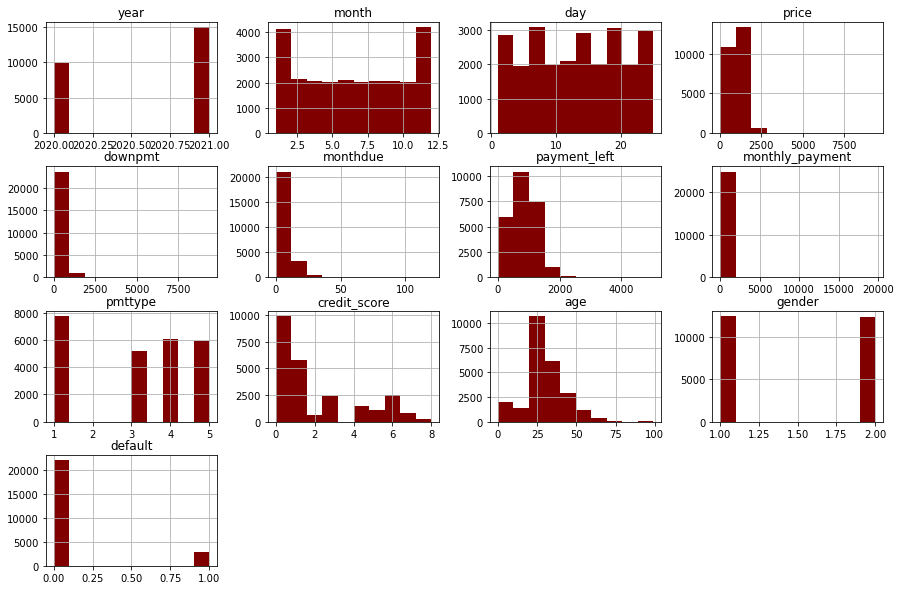

In [21]:
fig = plt.figure(figsize = (15, 10));
ax = fig.gca();
df.hist(ax = ax, color = 'maroon')
pass

**Check out correlation between the variables**

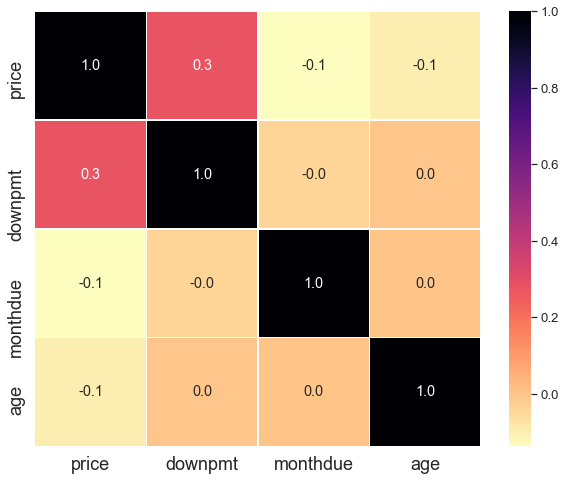

In [22]:
sns.set(font_scale = 1.2)
f, ax = plt.subplots(figsize = (10, 8))
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
sns.heatmap(df[['price', 'downpmt', 'monthdue', 'age']].corr(), annot = True, 
            linewidths = 0.5, fmt = '.1f', ax = ax, cmap = 'magma_r')
pass

<font color='red'><b>Are you able to identify correlations between different features based on the above?

### 3. Splitting features and target variable

In [23]:
df.columns

Index(['year', 'month', 'day', 'price', 'downpmt', 'monthdue', 'payment_left',
       'monthly_payment', 'pmttype', 'credit_score', 'age', 'gender',
       'default'],
      dtype='object')

In [24]:
X = df.drop(columns=['default'])

In [25]:
y = df['default']

### 4. Split into train test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### 5. Feature Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Modeling

**Since we have the target class, let's implement some supervised learning algorithms**

**Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
print("\nConfusion Matrix for Logistic Regression Model:\n\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression Model:\n\n", classification_report(y_test, y_pred_lr))


Confusion Matrix for Logistic Regression Model:

 [[8464  308]
 [ 644  518]]

Classification Report for Logistic Regression Model:

               precision    recall  f1-score   support

           0       0.93      0.96      0.95      8772
           1       0.63      0.45      0.52      1162

    accuracy                           0.90      9934
   macro avg       0.78      0.71      0.73      9934
weighted avg       0.89      0.90      0.90      9934



**Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [32]:
print("\nConfusion Matrix for Random Forest Model:\n\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model:\n\n", classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest Model:

 [[8493  279]
 [ 584  578]]

Classification Report for Random Forest Model:

               precision    recall  f1-score   support

           0       0.94      0.97      0.95      8772
           1       0.67      0.50      0.57      1162

    accuracy                           0.91      9934
   macro avg       0.81      0.73      0.76      9934
weighted avg       0.91      0.91      0.91      9934



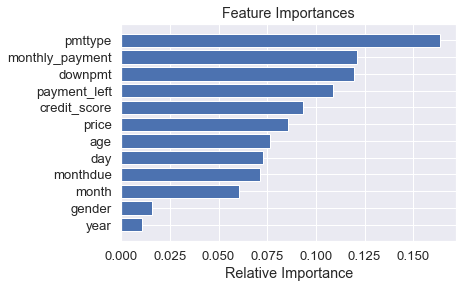

In [33]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color='red'><b> We have used Logistic Regression, Decision Tree and Random Forest to predict if a customer will default or not. Try 2 other models of your choice and evaluate them on 2 metrics of your choice that we haven't used so far

<font color='red'><b>Pick your best performing model and explain it using success metrics <br>

<font color='green'><b>Following are theoretical questions:

<font color='red'><b>For your business case which is more important - precision or recall? Why? <br>

<font color='red'><b>For your business case which is more important - accuracy or generalization? Why?

<font color='red'><b>How much does feature importance in Random Forest help in explainability to stakeholders? <br>

<font color='red'><b>Do you think these feature importance in Random Forest model align with what you were seeing in the EDA and correlations matrix?<br>

<font color='red'><b>Can you tie accuracies to business value (financial value)?

<font color='red'><b>Are these accuracies good enough and give the business value or the ROI they estimated? If not, what else will you do to improve accuracies to get higher business value?

<font color='red'><b>What other data set can you use for this project?

<font color='red'><b>What other pre processing or processing can be done to imporove the model?

<font color='red'><b>What other advanced algorithms would you want to try?